# Regression

In [1]:
import pandas as pd

fuel = pd.read_csv('fuel_data.txt', delimiter='\t')
fuel['minutes'] = fuel['duration'].apply(
                        lambda time:int(time.split(':')[0])*60+int(time.split(':')[1]))

fuel.head()

,date,starttime,endtime,starttemp,endtemp,air conditioner,trafic,route,dist,avg.cons.,speed,duration,fuel type,road,num. persons,minutes
0,2018.06.03,00:03,01:16,17,15,off,low,bp-dujv,69.8,4.5,57,01:13,95+,standard,1,73
1,2018.06.03,08:20,09:29,19,24,off,low,dujv-bp,68.6,4.6,59,01:09,95+,standard,2,69
2,2018.06.03,13:00,15:00,30,28,on,normal,bp-dujv,79.5,6.0,47,01:40,95+,standard,3,100
3,2018.06.04,15:30,16:30,29,28,on,normal,dujv-szelid,45.2,4.3,56,00:48,95+,standard,1,48
4,2018.06.04,18:18,19:10,30,25,on,normal,szelid-dujv,47.5,4.7,57,00:49,95+,standard,1,49


## Regressor

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

#Vector (size, 0)(size,)(size, None)
#Matrix (size, 1)
x = fuel['minutes'].values.reshape(-1,1)
y = fuel['dist']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=101)

model1 = LinearRegression()
model1.fit(xTrain, yTrain)

LinearRegression()

### Evaluation

In [3]:
from math import sqrt

yPred = model1.predict(xTest)

rmse = sqrt(mean_squared_error(yTest, yPred))
mae = mean_absolute_error(yTest, yPred)

print("RMSE = ", rmse)
print("MAE = ", mae)

RMSE =  9.796223220262325
MAE =  7.218690232923228


### Visualisation

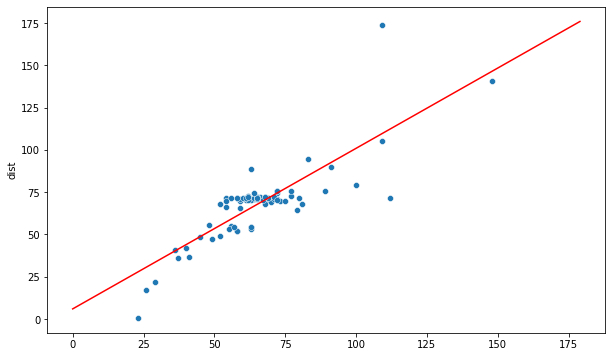

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

interval = np.arange(0, 180)
yInterval = model1.predict(interval.reshape(-1,1))

plt.figure(figsize=(10,6))
xOriginal = [arr[0] for arr in xTrain]
sns.scatterplot(x=xOriginal, y=yTrain)
plt.plot(interval, yInterval, color='r')

In [5]:
x = fuel[['minutes', 'speed']].values
y = fuel['dist']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=101)

model2 = LinearRegression()
model2.fit(xTrain, yTrain)

yPred = model2.predict(xTest)

rmse2 = sqrt(mean_squared_error(yTest, yPred))
mae2 = mean_absolute_error(yTest, yPred)

print("RMSE = ", rmse2)
print("MAE = ", mae2)

RMSE =  3.523379802675523
MAE =  1.9306478799891345


### Correlation

<AxesSubplot:>

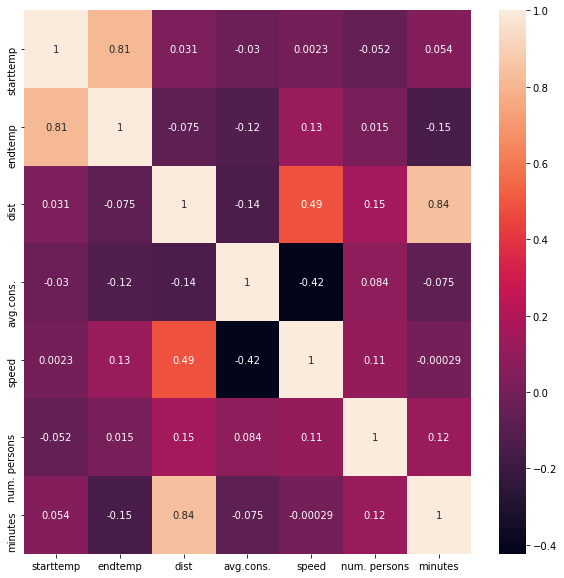

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(fuel.corr(), annot=True)

In [7]:
x = fuel[['minutes', 'speed', 'num. persons']].values
y = fuel['dist']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=101)

model3 = LinearRegression()
model3.fit(xTrain, yTrain)

yPred = model3.predict(xTest)

rmse3 = sqrt(mean_squared_error(yTest, yPred))
mae3 = mean_absolute_error(yTest, yPred)

print("RMSE = ", rmse3)
print("MAE = ", mae3)

RMSE =  3.5568743208171676
MAE =  1.888260853494937


In [8]:
print("Model 1: ", ("RMSE = ", rmse, "MAE = ", mae))
print("Model 2: ", ("RMSE = ", rmse2, "MAE = ", mae2))
print("Model 3: ", ("RMSE = ", rmse3, "MAE = ", mae3))

Model 1:  ('RMSE = ', 9.796223220262325, 'MAE = ', 7.218690232923228)
Model 2:  ('RMSE = ', 3.523379802675523, 'MAE = ', 1.9306478799891345)
Model 3:  ('RMSE = ', 3.5568743208171676, 'MAE = ', 1.888260853494937)


## Multiple Linear Regression

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df = pd.read_csv('multivar.csv')

df.head()

,x1,x2,y
0,-1.24869,-1.72494,-14.70222
1,3.22351,-1.15420,-13.45638
2,3.05634,-13.96543,-407.35140
3,4.14594,9.68764,-114.54969
4,0.26918,1.83166,-8.97082


In [10]:
df.describe()

,x1,x2,y
count,250.00000,250.00000,250.00000
mean,1.84735,0.15275,-54.04077
std,1.90793,5.12507,76.31689
min,-3.05665,-13.96543,-526.70219
25%,0.61168,-3.26172,-58.19205
50%,1.84484,-0.02292,-24.40812
75%,3.19914,3.86383,-10.65910
max,6.86968,15.15429,4.01796


### Pairplot

<Figure size 1080x1080 with 0 Axes>

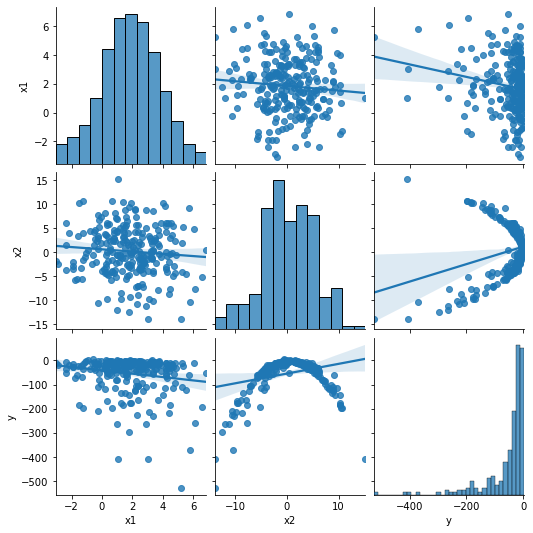

In [11]:
plt.figure(figsize=(15,15))
sns.pairplot(df, kind='reg')

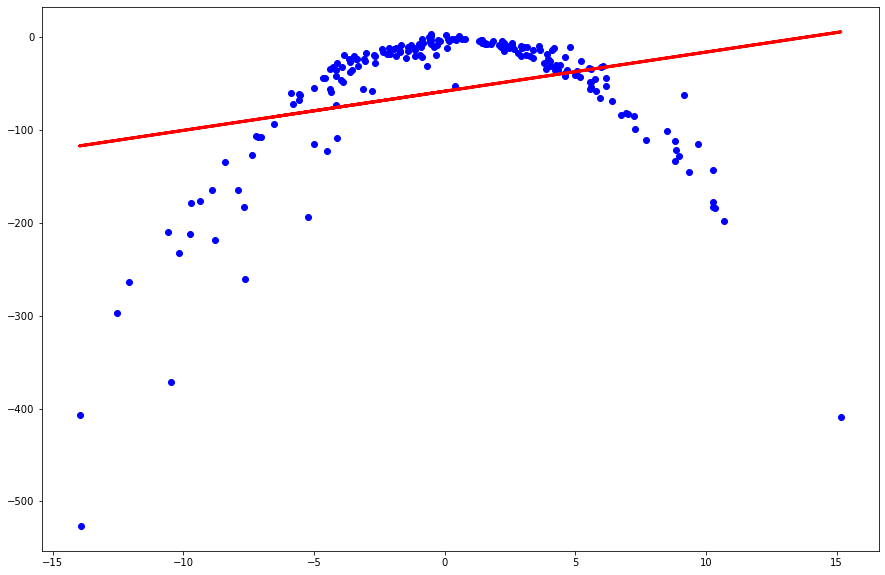

In [12]:
x = df['x2'].values.reshape(-1,1)
y = df['y']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=101)

model = LinearRegression()
model.fit(xTrain, yTrain)

yPred = model.predict(xTrain) #xTest

plt.figure(figsize=(15,10))
plt.scatter(xTrain, yTrain, color='b')
plt.plot(xTrain, yPred, color='r', linewidth=3)

plt.show()

### Two predictors

In [13]:
columns = ['x1', 'x2']
x = df[columns].values
y = df['y']

xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x, y, test_size=0.2, random_state=101)

model2 = LinearRegression()
model2.fit(xTrain2, yTrain2)

LinearRegression()

/Users/joseluis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


Text(0.5, 0, 'y')

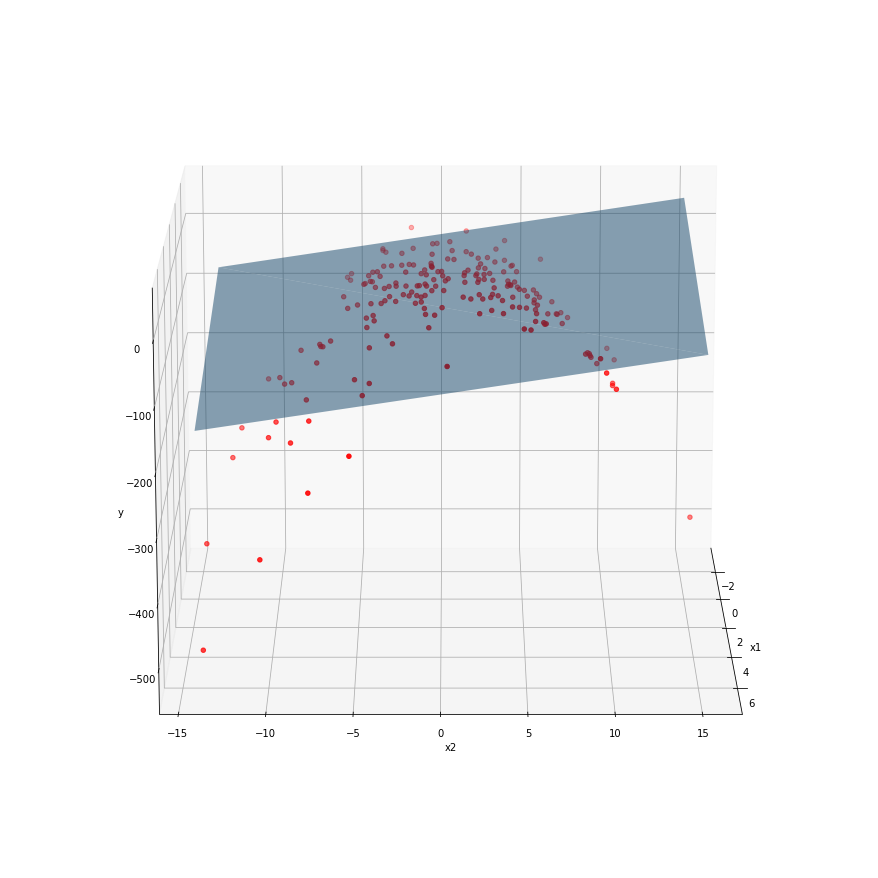

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,12))

ax = Axes3D(fig, elev=15, azim=0)

ax.scatter(xTrain2[:,0], xTrain2[:,1], yTrain2, c='r', marker='o')
ax.plot_trisurf(np.array([df['x1'].min(), df['x1'].min(), df['x1'].max(), df['x1'].max()]),
                np.array([df['x2'].min(), df['x2'].max(), df['x2'].min(), df['x2'].max()]),
                model2.predict(np.array([[df['x1'].min(), df['x2'].min()],
                                         [df['x1'].min(), df['x2'].max()],
                                         [df['x1'].max(), df['x2'].min()],
                                         [df['x1'].max(), df['x2'].max()]])), 
                alpha=.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [15]:
from matplotlib.animation import FuncAnimation

def update(i):
    ax.azim = i
    return ax

anim = FuncAnimation(fig, update, frames=range(361), interval=33)

anim.save('3d_animation.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


<img src="3d_animation.gif">

### Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

x = df[columns].values
y = df['y']
poly= PolynomialFeatures(degree=6)

xTrain4, xTest4, yTrain4, yTest4 = train_test_split(x, y, test_size=0.2, random_state=101)

xTrain4 = poly.fit_transform(xTrain4)
xTest4 = poly.fit_transform(xTest4)

model4 = LinearRegression()
model4.fit(xTrain4, yTrain4)

LinearRegression()

In [17]:
print(model4.intercept_)
print(model4.coef_)

-487930671.3822347
[ 4.87930669e+08 -3.23965302e-01 -2.51286227e-01 -6.87850594e-01
  2.89171232e-01 -1.75291677e+00  2.09252071e-01  4.25555339e-01
  9.33576437e-02 -1.54414898e-02  3.49841233e-02 -5.10077331e-02
  2.07289618e-02  1.21408451e-02 -8.80410029e-04 -4.16579631e-02
  6.57358067e-03 -6.30980923e-03 -9.35126646e-04 -1.09994556e-03
  1.24734555e-04  4.44709208e-03 -9.89355180e-05  6.13591849e-04
  1.40875022e-04 -6.17350970e-06 -9.99085110e-05  5.49674885e-06]


In [18]:
from sklearn.linear_model import Ridge, Lasso

model5 = Ridge(alpha=0.0001)
model5.fit(xTrain4, yTrain4)

print(model5.intercept_)
print(model5.coef_)

model6 = Lasso(alpha=0.0001, max_iter=10000)
model6.fit(xTrain4, yTrain4)

print(model6.intercept_)
print(model6.coef_)

-1.1844932841340423
[ 0.00000000e+00 -3.57236043e-01 -2.51164340e-01 -6.77339049e-01
  2.84787137e-01 -1.76168284e+00  2.08122641e-01  4.30346758e-01
  7.45337762e-02  8.96638327e-03  3.57893094e-02 -3.80664985e-02
  8.75248264e-05 -6.03825179e-03 -1.26446454e-03 -3.37170139e-02
  3.69304282e-03 -8.66728985e-03  4.06263685e-04 -4.20194884e-04
 -5.67480617e-05  3.28443003e-03  1.64822108e-04  1.17806171e-03
  2.10262664e-05  9.14208925e-05  2.55763991e-05  5.96008064e-06]
-1.651857501288184
[ 0.00000000e+00 -3.12462473e-01 -2.80362855e-01 -2.16996384e-01
  3.01435070e-01 -1.74313310e+00  7.39577916e-02  4.32751498e-01
  6.64631717e-02  9.83445587e-03  1.26494263e-03 -3.94039960e-02
 -8.02087369e-03 -6.95635113e-03 -1.35640146e-03 -1.90490684e-02
  4.03129631e-03 -4.79718919e-03  5.92197044e-04 -3.41676313e-04
 -5.87647190e-05  2.08997826e-03  1.22101807e-04  7.64904914e-04
  5.92636544e-06  8.13648090e-05  2.74633179e-05  5.94795243e-06]


/Users/joseluis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.03742e-19): result may not be accurate.
  overwrite_a=True).T
/Users/joseluis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850.7018579004587, tolerance: 127.20537665460137
  positive)


/Users/joseluis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Text(0.5, 0, 'y')

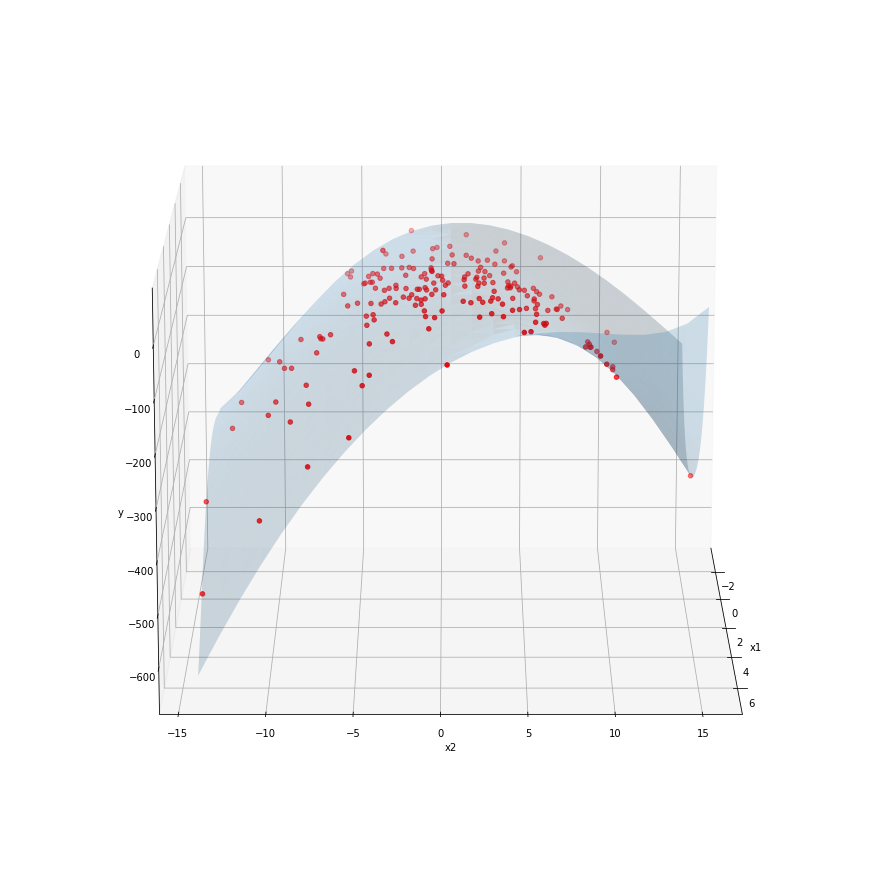

In [19]:
xs = []
ys = []

for x1 in np.linspace(df['x1'].min(), df['x1'].max(),25):
    for x2 in np.linspace(df['x2'].min(), df['x2'].max(),25):
        xs.append(x1)
        ys.append(x2)
        
xSurf = np.c_[xs, ys]
xSurfPoly = poly.fit_transform(xSurf)

zs = model6.predict(xSurfPoly)

fig = plt.figure(figsize=(16,12))

ax = Axes3D(fig, elev=15, azim=0)

ax.scatter(xTrain2[:,0], xTrain2[:,1], yTrain2, c='r', marker='o')
ax.plot_trisurf(xs, ys, zs, alpha=.2)

#2 -> 28

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [20]:
def update(i):
    ax.azim = i
    return ax

anim = FuncAnimation(fig, update, frames=range(361), interval=33)

anim.save('3d_model6.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


<img src="3d_model6.gif">